## Solutions to Task 1

#### Let us call the 3 campaigns Aldebaran, Bartledan, Cottington as a , b , c respectively for ease of use

> a)  Give an overview of the development of the entire market and the different campaigns. Please prepare 3-5 charts and summarize the most important findings.

> b) How would you assess the development of the quality of traffic, e.g. in terms of revenue per visitor. How is the overall development and how does each campaign evolve?

In [1]:
#Imports
import IPython
import numpy as np
import scipy as ap
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
import requests as rs
import networkx as nx
#import BeautifulSoup as bs
import mrjob as mj
#import pattern as p
import random
from importlib import reload
import seaborn as sns

In [18]:
# to open all the graphs in a new window
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'qt')

In [2]:
# reading the csv file 
url = "/Users/niveda.sridhar/Documents/triv/marketing_campaigns.csv"
df = pd.read_csv(url, sep=';')
print (df.head(),"\n")
print(df.dtypes,"\n")
print(df.shape)

   Week   Campaign  Visits    Revenue       Cost
0     1  Aldebaran      27   2.269511   3.763627
1     2  Aldebaran      64  10.820403  15.322613
2     3  Aldebaran      80   7.132998  10.753533
3     4  Aldebaran      93  11.085813  16.906191
4     5  Aldebaran     120  14.282481  21.446570 

Week          int64
Campaign     object
Visits        int64
Revenue     float64
Cost        float64
dtype: object 

(91, 5)


In [3]:
import pandasql as ps

sql = ("""select distinct campaign from df""" )
print(ps.sqldf(sql, locals()))

# There are 3 Marketing campaigns that are conducted Aldebaran, Bartledan, Cottington

     Campaign
0   Aldebaran
1   Bartledan
2  Cottington


In [4]:
# Data available is for 30 weeks
sqla = ("""select max(week) from df""" )
print(ps.sqldf(sqla, locals()))

   max(week)
0         30


In [27]:
# based on visits how did they perform 
sql2 = ("""select distinct campaign, sum(visits) from df group by 1""" )
a1 = ps.sqldf(sql2, locals())
print(a1)

# plainely based on the reach the campaign 'a' has performed very well.. 
#If the aim of the campaign was to reach more ppl then this is the way to go !!

     Campaign  sum(visits)
0   Aldebaran         9620
1   Bartledan         5188
2  Cottington         4648


In [28]:
# based on revenue how did they perform 
sql3 = ("""select distinct campaign, sum(revenue) from df group by 1""" )
a2 = ps.sqldf(sql3, locals())
print(a2)

# most of the revenue that has been eared was by the campaign 'c'

     Campaign  sum(revenue)
0   Aldebaran   2978.480026
1   Bartledan   7039.574788
2  Cottington  11525.515230


In [35]:
# based on Profits..
df1 = df
df1["Profits"] = df.Revenue - df.Cost
#print(df1.head(),"\n","\n")

sql4 = ("""select distinct campaign, sum(profits) from df1 group by 1""" )
a3 = ps.sqldf(sql4, locals())
print(a3)

# Looks like 'c' is working well it has the lowest reach but maximum profits
# 'b' is a losing one: lots of loss and even the reach is not the highest. 
# based on these data alone: I would rank the campaign as 1)c 2)a 3)b 

     Campaign  sum(profits)
0   Aldebaran     28.891543
1   Bartledan   -798.705144
2  Cottington    333.552036


In [36]:
# revenue per visitor (rpv)
df1["rpv"] = df.Revenue / df.Visits
#print(df1.head(),"\n","\n")

sql5 = ("""select distinct campaign, sum(rpv) from df1 group by 1""" )
a4 = ps.sqldf(sql5, locals())
print(ps.sqldf(sql5, locals()))

     Campaign   sum(rpv)
0   Aldebaran   7.940035
1   Bartledan  39.308939
2  Cottington  76.884429


In [37]:
# profits per visitor(ppv)
df1["ppv"] = df.Profits / df.Visits

sql6 = ("""select distinct campaign, sum(ppv) from df1 group by 1""" )
a5 = ps.sqldf(sql6, locals())
print(a5)

     Campaign  sum(ppv)
0   Aldebaran -0.553005
1   Bartledan -4.428387
2  Cottington  2.215844


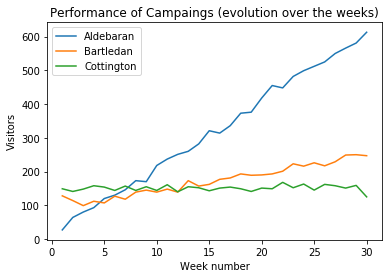

In [16]:
# Graphical representation 1 -- Performance of Campaings (evolution over the weeks based on visitors)

sql7 = ("""select week, visits from df1 where campaign = 'Aldebaran'""" )
#print(ps.sqldf(sql7, locals()))
dfa = ps.sqldf(sql7, locals())

sql8 = ("""select week, visits from df1 where campaign = 'Bartledan'""" )
dfb = ps.sqldf(sql8, locals())

sql9 = ("""select week, visits from df1 where campaign = 'Cottington'""" )
dfc = ps.sqldf(sql9, locals())
plt.xlabel('Week number')
plt.ylabel('Visitors')

plt.title("Performance of Campaings (evolution over the weeks)")
plt.plot(dfa.Week, dfa.Visits, label='Aldebaran')
plt.plot(dfb.Week, dfb.Visits, label='Bartledan')
plt.plot(dfc.Week, dfc.Visits, label='Cottington')

plt.legend()
plt.show()


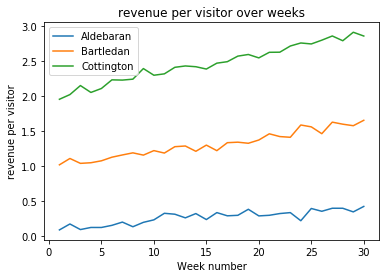

In [18]:
# Graphical representation 2 (revenue per visitor over weeks)

sql10 = ("""select week, rpv from df1 where campaign = 'Aldebaran'""" )
#print(ps.sqldf(sql10, locals()))
dfa = ps.sqldf(sql10, locals())

sql11 = ("""select week, rpv from df1 where campaign = 'Bartledan'""" )
dfb = ps.sqldf(sql11, locals())

sql12 = ("""select week, rpv from df1 where campaign = 'Cottington'""" )
dfc = ps.sqldf(sql12, locals())
plt.xlabel('Week number')
plt.ylabel('revenue per visitor')

plt.title("revenue per visitor over weeks")
plt.plot(dfa.Week, dfa.rpv, label='Aldebaran')
plt.plot(dfb.Week, dfb.rpv, label='Bartledan')
plt.plot(dfc.Week, dfc.rpv, label='Cottington')

plt.legend()
plt.show()


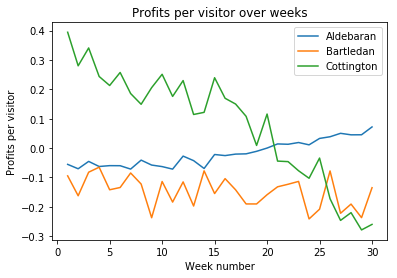

In [20]:
# Graphical representation 3 (Profits per visitor over weeks)

sql13 = ("""select week, ppv from df1 where campaign = 'Aldebaran'""" )
#print(ps.sqldf(sql10, locals()))
dfa = ps.sqldf(sql13, locals())

sql14 = ("""select week, ppv from df1 where campaign = 'Bartledan'""" )
dfb = ps.sqldf(sql14, locals())

sql15 = ("""select week, ppv from df1 where campaign = 'Cottington'""" )
dfc = ps.sqldf(sql15, locals())

plt.xlabel('Week number')
plt.ylabel('Profits per visitor')

plt.title("Profits per visitor over weeks")
plt.plot(dfa.Week, dfa.ppv, label='Aldebaran')
plt.plot(dfb.Week, dfb.ppv, label='Bartledan')
plt.plot(dfc.Week, dfc.ppv, label='Cottington')

plt.legend()
plt.show()

# Interesting !!! c has a profit that is reducing over time !! its going into negatives after 20th week! I wonder why?
# b is more or less stagnent so :: No comments there!
# a has a slightly upward trend but it does not show a significant increase. 

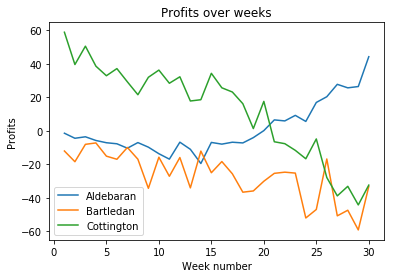

In [23]:
# Graphical representation 4 (Profits over weeks)

sql16 = ("""select week, Profits from df1 where campaign = 'Aldebaran'""" )
#print(ps.sqldf(sql10, locals()))
dfa = ps.sqldf(sql16, locals())

sql17 = ("""select week, Profits from df1 where campaign = 'Bartledan'""" )
dfb = ps.sqldf(sql17, locals())

sql18 = ("""select week, Profits from df1 where campaign = 'Cottington'""" )
dfc = ps.sqldf(sql18, locals())

plt.xlabel('Week number')
plt.ylabel('Profits')

plt.title("Profits over weeks")
plt.plot(dfa.Week, dfa.Profits, label='Aldebaran')
plt.plot(dfb.Week, dfb.Profits, label='Bartledan')
plt.plot(dfc.Week, dfc.Profits, label='Cottington')

plt.legend()
plt.show()

# profit trend of campaign a looks promising now!

In [50]:
# costs per campaign !
sqln = ("""select distinct campaign, sum(Cost) from df group by 1""" )
a6 = ps.sqldf(sqln, locals())
print(a6)


     Campaign     sum(Cost)
0   Aldebaran   2949.588483
1   Bartledan   7838.279932
2  Cottington  11191.963194


In [52]:
# Summary 
b1 = pd.merge(a1,a2,how='left', on = 'Campaign')
b2 = pd.merge(b1,a3,how='left', on = 'Campaign')
b3 = pd.merge(b2,a4,how='left', on = 'Campaign')
b4 = pd.merge(b3,a5,how='left', on = 'Campaign')
b5 = pd.merge(b4,a6,how='left', on = 'Campaign')
print(b5)

#rpv is revenue per user
#ppv is profits per user

     Campaign  sum(visits)  sum(revenue)  sum(profits)   sum(rpv)  sum(ppv)  \
0   Aldebaran         9620   2978.480026     28.891543   7.940035 -0.553005   
1   Bartledan         5188   7039.574788   -798.705144  39.308939 -4.428387   
2  Cottington         4648  11525.515230    333.552036  76.884429  2.215844   

      sum(Cost)  
0   2949.588483  
1   7838.279932  
2  11191.963194  


### Some observations based on data summary:

> The campaign 'a' has maximum reach. If the intention of the campaign was to make the product more visible to people then this is the campaing to go for. Most of the numbers look positive! Even though the revenue amount is small it shows minor profits and also has lower cost.

> Campaign 'b' has lower reach and is under a huge loss! So just would not recommend.

> Campaign 'c' looks good if bringing in more revenue was the goal. It needs more investment money (due to more cost) but also shows good returns.

### Observations based on Graphs: (representing how the campaign evolves over time)

> First of all lets forget campaign 'b' it is either stagnant or shows a downward trend.

> Now lets talk about campaign 'a' :: It shows increasing visitors over time, currently has lowest revenue BUT shows that in the later half it is doing very well. The profits mare increasing significantly as time goes on.

> 'c' :: Number of visitors are pretty stable over time. Shows a very good start in terms of profits initially but has a down fall



c)  You are talking with the responsible business developer for the market who wants to spend an additional 250€ per week from week 31 onwards. Please help him out with the following questions:

What is your advice in which campaign to invest and why?
How do you expect this to impact the overall performance in the market from week 31 onwards?



### Advice

> I would surely not go for 'b'

> Campaign c needs around 374euros per week to keep it going (11191/30 = 374). so this cannot fit in the 250euro budget

> 'a' shows a positive trend in terms of revenue and profits in the recent past and also has max reach, it also fits in the budget of 250per week as the campaign costs approximately 100euro per week (2949/30 = 99 euro). So i would suggest go with campaign 'a' based on the analysis.

## Rough work